# DATA1030 Project: Pokemon Battle Analysis

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

pkmn = pd.read_csv(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\data\pokemon.csv")
pkmn = pkmn.rename(index=str, columns={"#": "ID"})
battle = pd.read_csv(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\data\combats.csv")
pkmn.head()

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [2]:
battle.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [3]:
print("Shape of Pokemon data: ", (pkmn.shape))
print("Shape of Battle data: ", (battle.shape))

Shape of Pokemon data:  (800, 12)
Shape of Battle data:  (50000, 3)


In [4]:
# Identifying missing values
pkmn.isnull().sum()

ID              0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
battle.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [6]:
# Singling out Pokemone with missing name
pkmn[pkmn['Name'].isnull()]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [7]:
# By looking at the online Pokemon database (https://www.serebii.net/pokemon/type/fighting/), able to match the missing Pokemon name to "Primeape", which has exactly the above stat profile among the pool of 7 pure Fighting-type (i.e. no Type 2) Pokemons in Generation 1.
pkmn['Name'][62] = "Primeape"

C:\Users\User\AppData\Local\Temp\ipykernel_27768\2549842310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pkmn['Name'][62] = "Primeape"


In [8]:
# Feature engineering & merging datasets
winTotal = battle.Winner.value_counts()
winTotal = winTotal.sort_index()
firstAtk_Count = battle.First_pokemon.value_counts()
secondAtk_Count = battle.Second_pokemon.value_counts()
battleTotal = firstAtk_Count + secondAtk_Count

In [9]:
featEng = pd.DataFrame()
featEng['Total Win Count'] = winTotal
featEng['Total Battle Count'] = battleTotal
# featEng['First Attack Count'] = firstAtk_Count
# featEng['First Attack Rate'] = firstAtk_Count/battleTotal
featEng['Win Rate']= winTotal/battleTotal
pkmnWR = pd.merge(pkmn, featEng, right_index = True, left_on='ID')
pkmnWR

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Win Count,Total Battle Count,Win Rate
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,112,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39,105,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116,131,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60,119,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89,144,0.618056


In [10]:
pkmnAll = pd.merge(pkmn, featEng, left_on='ID', right_index = True, how='left')
pkmnAll[pkmnAll['Win Rate'].isnull()]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Win Count,Total Battle Count,Win Rate
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN


In [11]:
pkmnWR.describe()

,ID,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total Win Count,Total Battle Count,Win Rate
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,402.873563,69.140485,79.007663,73.699872,72.839080,71.749681,68.443167,3.339719,63.856960,127.541507,0.501538
std,230.297452,25.348783,32.502566,30.879737,32.672868,27.248993,29.158076,1.656435,32.925941,11.397402,0.254993
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,3.000000,92.000000,0.021739
25%,204.500000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.000000,36.000000,120.000000,0.284228
50%,403.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000,62.000000,128.000000,0.491071
75%,601.500000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000,91.000000,135.000000,0.717644
max,800.000000,255.000000,190.000000,230.000000,194.000000,200.000000,180.000000,6.000000,152.000000,164.000000,0.984496


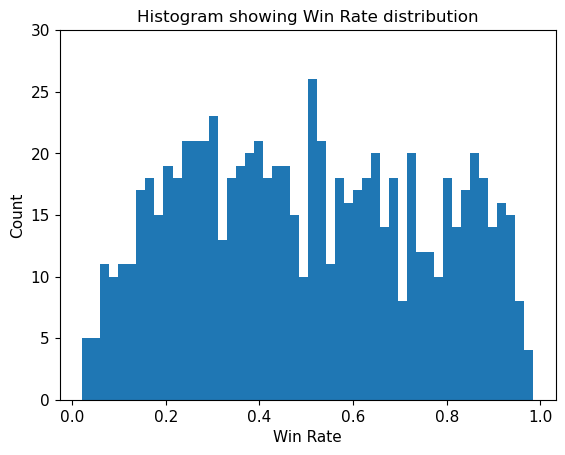

In [12]:
pkmnWR['Win Rate'].plot.hist(bins = 50,fontsize=11)
ax = plt.gca()
ax.set_ylim([0, 30])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Count',fontsize=11)
# arial = {'fontname':'Arial'}
# txt="Figure 1: Histogram showing Win Rate distribution."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Histogram showing Win Rate distribution',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\WR Histogram.png")
plt.show()

In [13]:
# Pearson correlation table & heatmap 
col = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Win Rate']
pkmnWR.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Win Rate
HP,1.000000,0.417427,0.265230,0.363244,0.409110,0.179423,0.280265,0.258006
Attack,0.417427,1.000000,0.464539,0.395211,0.288078,0.382310,0.348391,0.500181
Defense,0.265230,0.464539,1.000000,0.237592,0.490118,0.025762,0.247921,0.129426
Sp. Atk,0.363244,0.395211,0.237592,1.000000,0.529276,0.470548,0.448339,0.478940
Sp. Def,0.409110,0.288078,0.490118,0.529276,1.000000,0.276715,0.367030,0.324218
Speed,0.179423,0.382310,0.025762,0.470548,0.276715,1.000000,0.323420,0.937742
Legendary,0.280265,0.348391,0.247921,0.448339,0.367030,0.323420,1.000000,0.325007
Win Rate,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,0.325007,1.000000


                 HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
HP         1.000000  0.417427  0.265230  0.363244  0.409110  0.179423   
Attack     0.417427  1.000000  0.464539  0.395211  0.288078  0.382310   
Defense    0.265230  0.464539  1.000000  0.237592  0.490118  0.025762   
Sp. Atk    0.363244  0.395211  0.237592  1.000000  0.529276  0.470548   
Sp. Def    0.409110  0.288078  0.490118  0.529276  1.000000  0.276715   
Speed      0.179423  0.382310  0.025762  0.470548  0.276715  1.000000   
Legendary  0.280265  0.348391  0.247921  0.448339  0.367030  0.323420   
Win Rate   0.258006  0.500181  0.129426  0.478940  0.324218  0.937742   

           Legendary  Win Rate  
HP          0.280265  0.258006  
Attack      0.348391  0.500181  
Defense     0.247921  0.129426  
Sp. Atk     0.448339  0.478940  
Sp. Def     0.367030  0.324218  
Speed       0.323420  0.937742  
Legendary   1.000000  0.325007  
Win Rate    0.325007  1.000000  


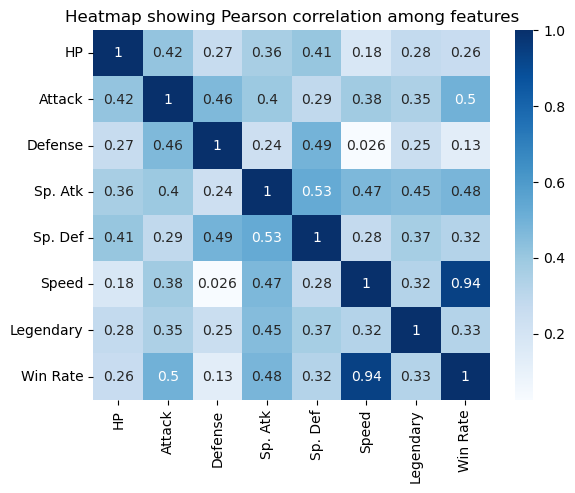

In [14]:
# Pearson correlation table & heatmap
import seaborn as sns

corr = pkmnWR.loc[:,col].corr(method='pearson', min_periods=1)
print(pkmnWR.loc[:,col].corr(method='pearson', min_periods=1))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Heatmap showing Pearson correlation among features',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Pearson Correlation Heatmap.png")

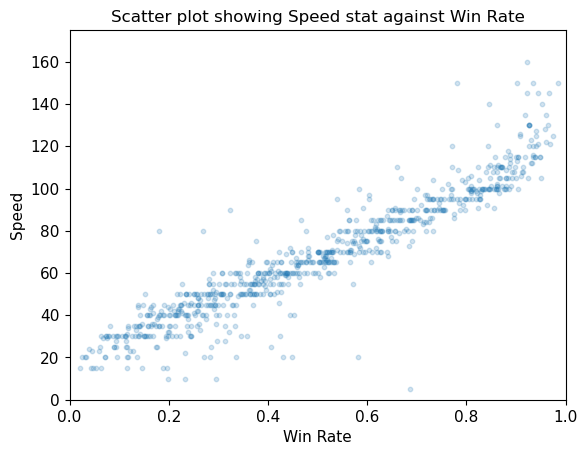

In [15]:
pkmnWR.plot.scatter('Win Rate', 'Speed',s=10,alpha=0.2,fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 175])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Speed',fontsize=11)
# txt="Scatter plot showing Speed stat against Win Rate."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Scatter plot showing Speed stat against Win Rate',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Speed-WR Scatter Plot.png")
plt.show()

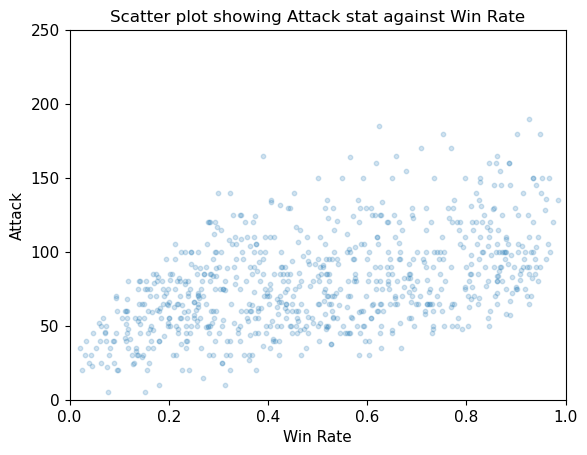

In [16]:
pkmnWR.plot.scatter('Win Rate', 'Attack',s=10,alpha=0.2,fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 250])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Attack',fontsize=11)
# txt="Scatter plot showing Attack stat against Win Rate."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Scatter plot showing Attack stat against Win Rate', fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Attack-WR Scatter Plot.png")
plt.show()

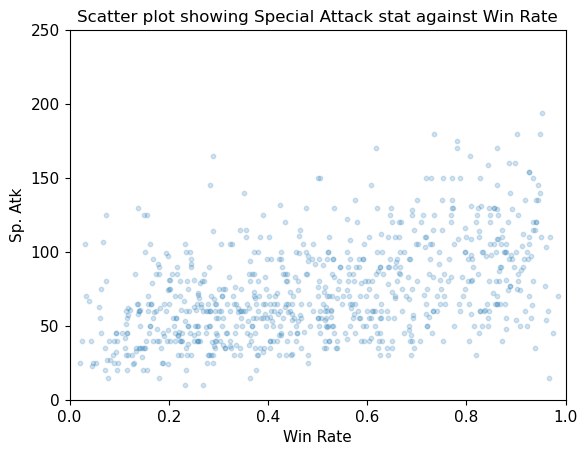

In [17]:
pkmnWR.plot.scatter('Win Rate', 'Sp. Atk',s=10,alpha=0.2,fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 250])
plt.xlabel('Win Rate',fontsize=11)
plt.ylabel('Sp. Atk',fontsize=11)
# txt="Scatter plot showing Special Attack stat against Win Rate."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Scatter plot showing Special Attack stat against Win Rate',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\SpAtk-WR Scatter Plot.png")
plt.show()

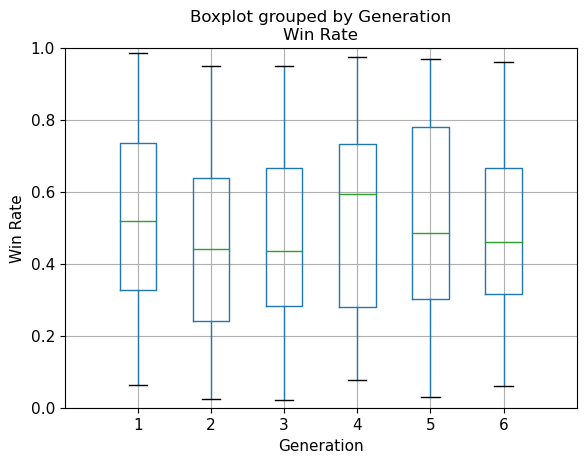

In [18]:
pkmnWR[['Win Rate','Generation']].boxplot(by='Generation',fontsize=11)
ax = plt.gca()
ax.set_xlim([0, 7])
ax.set_ylim([0, 1])
plt.ylabel('Win Rate',fontsize=11)
plt.xlabel('Generation',fontsize=11)
# txt="Box plot comparing Win Rate of Pokemons across 6 generations."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Generation-WR Box Plot.png")
plt.show()

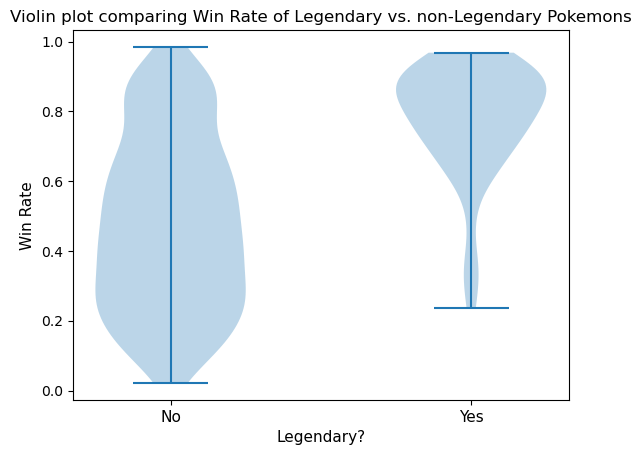

In [19]:
dataset = [pkmnWR[pkmnWR['Legendary']==False]['Win Rate'].values,
           pkmnWR[pkmnWR['Legendary']==True]['Win Rate'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['No','Yes'],fontsize=11)
plt.ylabel('Win Rate',fontsize=11)
plt.xlabel('Legendary?',fontsize=11)
# txt="Violin plot comparing Win Rate of Legendary vs. non-Legendary Pokemons."
# plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.title('Violin plot comparing Win Rate of Legendary vs. non-Legendary Pokemons',fontsize=12)
plt.savefig(r"C:\Users\User\Desktop\DSI\DATA1030-Fall2022\Taemin Huh DATA1030 Project\figures\Legendary Violin Plot.png")
plt.show()

## Preprocessing

In [20]:
from sklearn.model_selection import train_test_split 
y = pkmnWR['Win Rate']
X = pkmnWR.loc[:, pkmnWR.columns != 'Win Rate']

print(X.head())
print(X.shape)
print(y)

   ID           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1   2        Ivysaur  Grass  Poison  60      62       63       80       80   
2   3       Venusaur  Grass  Poison  80      82       83      100      100   
3   4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4   5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  Total Win Count  Total Battle Count  
0     45           1      False               37                 133  
1     60           1      False               46                 121  
2     80           1      False               89                 132  
3     80           1      False               70                 125  
4     65           1      False               55                 112  
(783, 14)
0      0.278195
1      0.380165
2      0.674242
3      0.560000
4      0.491071
         ...   

In [21]:
def basic_split(X,y,train_size,val_size,test_size,random_state):
     
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state=random_state)
    print('training set:',X_train.shape, y_train.shape) 
    print(X_other.shape, y_other.shape)
    
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/(val_size+test_size),random_state=random_state)
    print('validation set:',X_val.shape, y_val.shape)
    print('test set:',X_test.shape, y_test.shape)

    print(X_train.head())
    return X_train, y_train, X_val, y_val, X_test, y_test

print(basic_split(X,y,0.6,0.2,0.2,7))

training set: (469, 14) (469,)
(314, 14) (314,)
validation set: (157, 14) (157,)
test set: (157, 14) (157,)
      ID              Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  \
95    96            Grimer  Poison     NaN   80      80       50       40   
221  222         Dunsparce  Normal     NaN  100      70       70       65   
139  140          Magikarp   Water     NaN   20      10       55       15   
541  542            Palkia   Water  Dragon   90     120      100      150   
7      8  Mega Charizard X    Fire  Dragon   78     130      111      130   

     Sp. Def  Speed  Generation  Legendary  Total Win Count  \
95        50     25           1      False               25   
221       65     45           2      False               26   
139       20     80           1      False               25   
541      120    100           4       True              115   
7         85    100           1      False              119   

     Total Battle Count  
95                  142 

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,7)

# Pre-processing with OneHotEncoder and MinMaxScaler

onehot_ftrs = ['Type 1', 'Type 2', 'Generation', 'Legendary']
minmax_ftrs = ['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print('X_train shape:',X_train.shape)
print('X_train_prep shape:',X_train_prep.shape)
print(X_train_prep)

training set: (469, 14) (469,)
(314, 14) (314,)
validation set: (157, 14) (157,)
test set: (157, 14) (157,)
      ID              Name  Type 1  Type 2   HP  Attack  Defense  Sp. Atk  \
95    96            Grimer  Poison     NaN   80      80       50       40   
221  222         Dunsparce  Normal     NaN  100      70       70       65   
139  140          Magikarp   Water     NaN   20      10       55       15   
541  542            Palkia   Water  Dragon   90     120      100      150   
7      8  Mega Charizard X    Fire  Dragon   78     130      111      130   

     Sp. Def  Speed  Generation  Legendary  Total Win Count  \
95        50     25           1      False               25   
221       65     45           2      False               26   
139       20     80           1      False               25   
541      120    100           4       True              115   
7         85    100           1      False              119   

     Total Battle Count  
95                  142 